In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing csv file 

In [2]:
df = pd.read_csv("ad_click_dataset.csv")
df.head(10)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
5,5942,User5942,NaN,Non-Binary,NaN,Bottom,Social Media,Evening,1
6,7808,User7808,26.0,Female,Desktop,Top,NaN,NaN,1
7,5065,User5065,40.0,Male,Mobile,Side,NaN,Evening,0
8,7993,User7993,NaN,Non-Binary,Mobile,Bottom,Social Media,NaN,1
9,4509,User4509,NaN,NaN,NaN,Bottom,Education,Afternoon,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


# Checking for null values

In [4]:
columns = df.columns
columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

In [5]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

null_percentages= get_null_percentages(df,df.columns)


Calculating null percentage for each column 

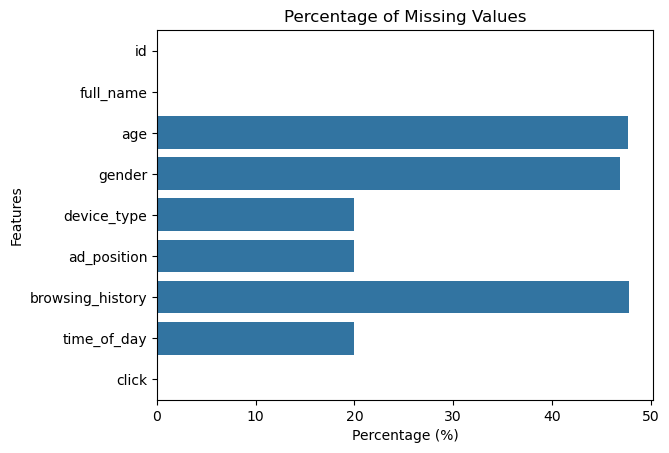

In [6]:
sns.barplot(data=null_percentages, x=null_percentages.values(), y=null_percentages.keys(), legend=False).set(title="Percentage of Missing Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

In [7]:
#df.dropna(subset = ["device_type","ad_position","time_of_day"],inplace = True)

In [8]:
df.head(10)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
5,5942,User5942,NaN,Non-Binary,NaN,Bottom,Social Media,Evening,1
6,7808,User7808,26.0,Female,Desktop,Top,NaN,NaN,1
7,5065,User5065,40.0,Male,Mobile,Side,NaN,Evening,0
8,7993,User7993,NaN,Non-Binary,Mobile,Bottom,Social Media,NaN,1
9,4509,User4509,NaN,NaN,NaN,Bottom,Education,Afternoon,1


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  
df['age'] = imputer.fit_transform(df[['age']])

In [10]:
df.fillna("Unknown", inplace=True) 

In [11]:
df.head(10)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,Unknown,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,39.5,Male,Desktop,Top,Unknown,Unknown,1
2,5912,User5912,41.0,Non-Binary,Unknown,Side,Education,Night,1
3,5418,User5418,34.0,Male,Unknown,Unknown,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,Unknown,Unknown,Social Media,Morning,0
5,5942,User5942,39.5,Non-Binary,Unknown,Bottom,Social Media,Evening,1
6,7808,User7808,26.0,Female,Desktop,Top,Unknown,Unknown,1
7,5065,User5065,40.0,Male,Mobile,Side,Unknown,Evening,0
8,7993,User7993,39.5,Non-Binary,Mobile,Bottom,Social Media,Unknown,1
9,4509,User4509,39.5,Unknown,Unknown,Bottom,Education,Afternoon,1


In [12]:
#Categorical_imputer = SimpleImputer(strategy = "most_frequent")
#col = ["gender","device_type","ad_position","browsing_history","time_of_day"]
#df[col] = Categorical_imputer.fit_transform(df[col])

# EDA 

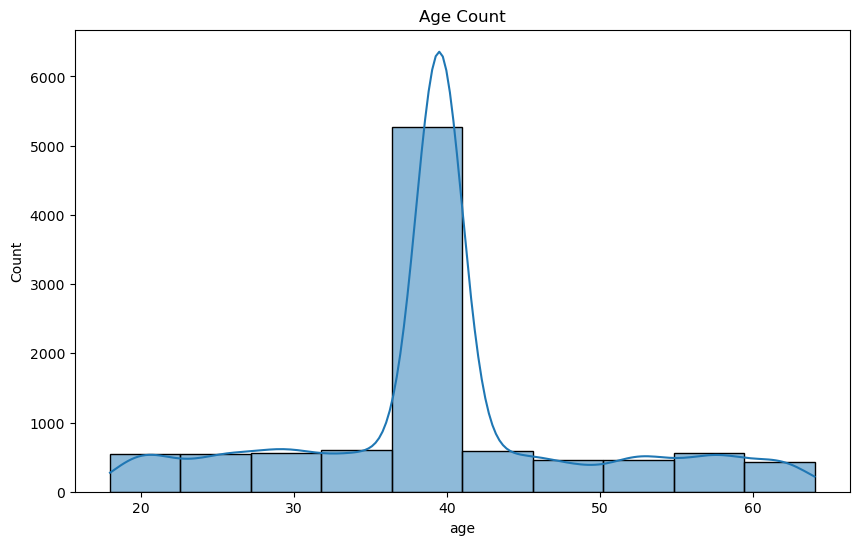

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins = 10, kde=True)
plt.title('Age Count')
plt.show()

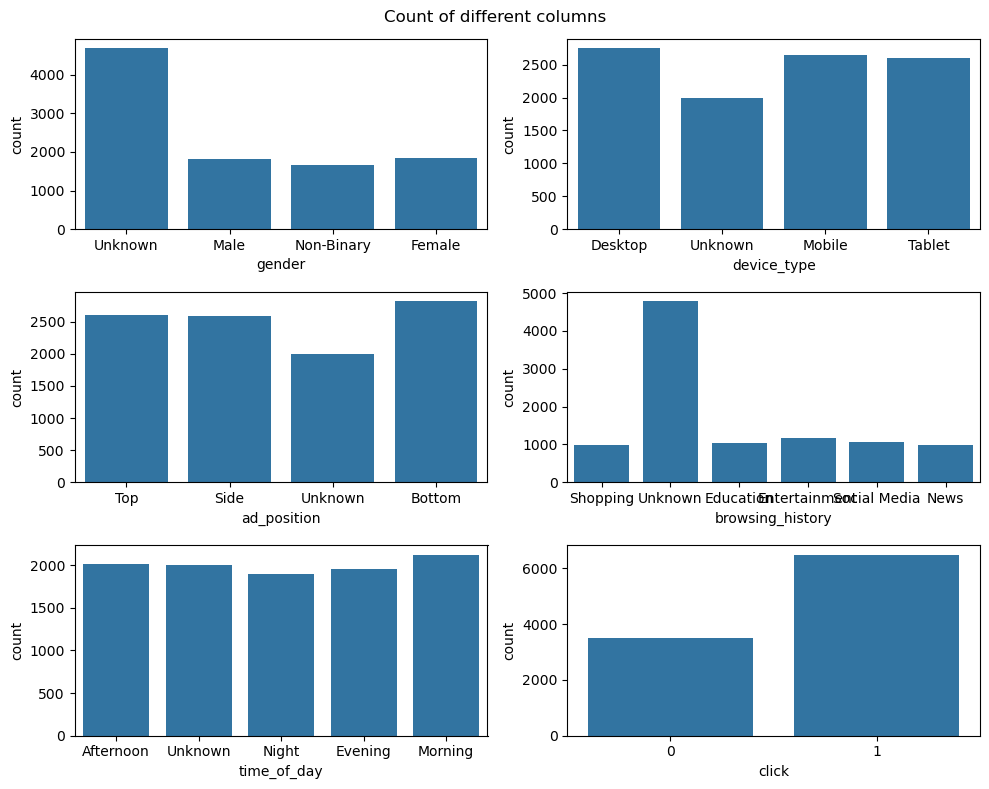

In [14]:
fig,axes = plt.subplots(3,2 ,figsize = (10,8))
plt.suptitle("Count of different columns")

sns.countplot(ax=axes[0, 0], x='gender', data=df)
sns.countplot(ax=axes[0, 1], x='device_type', data=df)
sns.countplot(ax=axes[1, 0], x='ad_position', data=df)
sns.countplot(ax=axes[1, 1], x='browsing_history', data=df)
sns.countplot(ax=axes[2, 0], x='time_of_day', data=df)
sns.countplot(ax=axes[2, 1], x='click', data=df)


plt.tight_layout()
plt.show()

In [15]:
df.to_csv("new_data.csv",index=False)

# ML 

In [16]:
df_new = pd.read_csv("new_data.csv")

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoded_array = encoder.fit_transform(df_new[["gender","device_type","ad_position","browsing_history","time_of_day"]])

# Convert to DataFrame
df_encode = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())

print(df_encode)


      gender_Female  gender_Male  gender_Non-Binary  gender_Unknown  \
0               0.0          0.0                0.0             1.0   
1               0.0          1.0                0.0             0.0   
2               0.0          0.0                1.0             0.0   
3               0.0          1.0                0.0             0.0   
4               0.0          0.0                1.0             0.0   
...             ...          ...                ...             ...   
9995            0.0          0.0                0.0             1.0   
9996            1.0          0.0                0.0             0.0   
9997            0.0          1.0                0.0             0.0   
9998            0.0          0.0                0.0             1.0   
9999            0.0          1.0                0.0             0.0   

      device_type_Desktop  device_type_Mobile  device_type_Tablet  \
0                     1.0                 0.0                 0.0   
1        

C:\Users\DELL\Desktop\ADC_pr\env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
df_encode = pd.concat([
    df_new.drop(["gender","device_type","ad_position","browsing_history","time_of_day"], axis=1),
    df_encode
], axis=1)

In [19]:
df_encode

,id,full_name,age,click,gender_Female,gender_Male,gender_Non-Binary,gender_Unknown,device_type_Desktop,device_type_Mobile,...,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,browsing_history_Unknown,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,time_of_day_Unknown
0,670,User670,22.0,1,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3044,User3044,39.5,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5912,User5912,41.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5418,User5418,34.0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9452,User9452,39.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,39.5,0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,7843,User7843,39.5,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,3914,User3914,39.5,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9998,7924,User7924,39.5,1,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df_encode.drop(["id","full_name"],axis = 1 ,inplace =True)

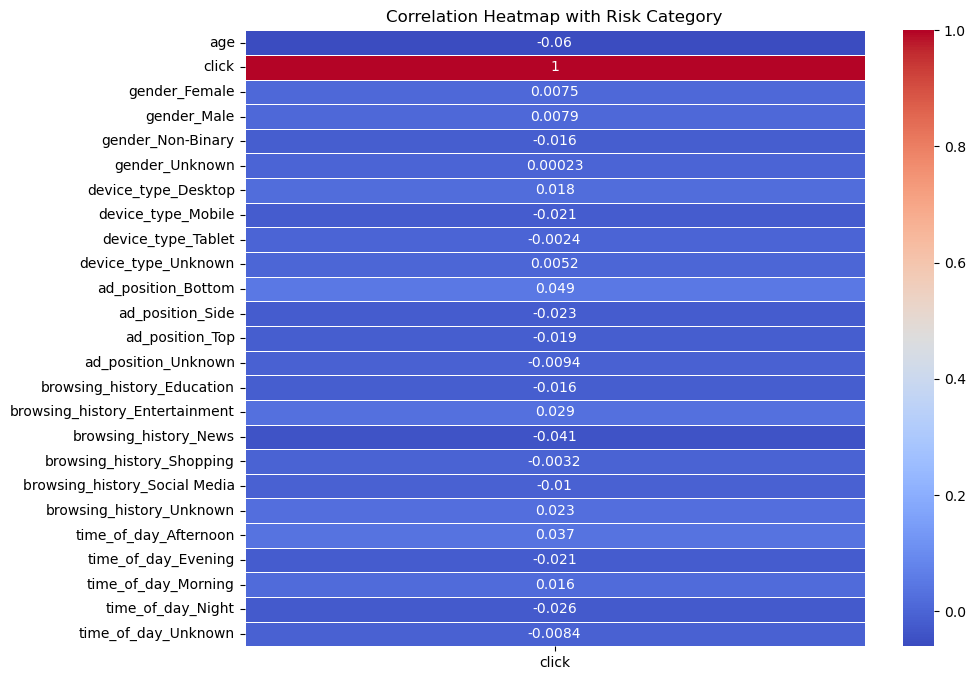

In [21]:
correlation_matrix = df_encode.corr()

# Extract the correlation of each feature with the 'Risk_Category'
risk_category_corr = correlation_matrix[['click']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(risk_category_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Risk Category')
plt.show()


In [22]:
feature_column = df_encode.columns[df_encode.columns != 'click'] # all columns that are not Risk_Category
target_column = "click"

In [23]:
X = df_encode[feature_column]
y = df_encode[target_column]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42) # random_state=42 is used to ensure reproducibility by setting a seed for random number generation

# Fit the RandomForestClassifier model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = clf.predict(X_test) # the predicted class labels for each sample in X_test are being stored in y_pred

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 70.5%


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 316  389]
 [ 201 1094]]


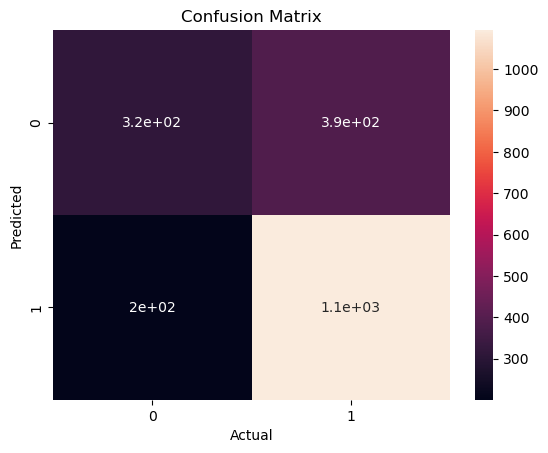

In [29]:
sns.heatmap(cm,annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       705
           1       0.74      0.84      0.79      1295

    accuracy                           0.70      2000
   macro avg       0.67      0.65      0.65      2000
weighted avg       0.69      0.70      0.69      2000



In [31]:
y.value_counts()

click
1    6500
0    3500
Name: count, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE()

In [33]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [55]:
# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.8,test_size=0.2, random_state=42)

In [72]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(random_state=42, n_estimators=100)

# eval_metric='mlogloss' specifies the evaluation metric to use, in this case, log loss for multi-class classification
# n_estimators=100 sets the number of boosting rounds (trees) to 100

# Train the XGBClassifier on the resampled training data
xgb_clf.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [73]:
y_pred_xgb = xgb_clf.predict(X_test_resampled)

In [74]:
print(accuracy_score(y_test_resampled, y_pred_xgb))

0.77


In [59]:
clf = RandomForestClassifier(random_state=42) # random_state=42 is used to ensure reproducibility by setting a seed for random number generation

# Fit the RandomForestClassifier model to the training data
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = clf.predict(X_test_resampled) # the predicted class labels for each sample in X_test are being stored in y_pred

In [61]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_resampled, y_pred)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 75.73076923076924%


In [75]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100,150,200],
    'learning_rate': [ 0.1, 0.3,0.5],
    'max_depth': [6, 9,10] 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 200}
Best accuracy score:  0.7875


In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [200,300],
    'max_depth': [10,15,20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score:  0.7645192307692308


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model
extra_trees_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = extra_trees_model.predict(X_test_resampled)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Extra Trees Classifier Accuracy: {accuracy:.2f}")

Extra Trees Classifier Accuracy: 0.75


In [65]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test_resampled)

# Evaluate the model
accuracy_tree = accuracy_score(y_test_resampled, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")

Decision Tree Accuracy: 0.75


In [66]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ensure that data is in C-contiguous format
X_train = np.ascontiguousarray(X_train_resampled)
X_test = np.ascontiguousarray(X_test_resampled)

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train_resampled)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_resampled, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.75


In [67]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1,2,3, 5],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV with KNN
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train_resampled)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model found by GridSearchCV
best_knn_model = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_resampled, y_pred_knn)
print(f"Optimized KNN Accuracy: {accuracy_knn:.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Optimized KNN Accuracy: 0.77


In [77]:
import pickle

In [78]:
f_name = "Trained_model.sav"
pickle.dump(xgb_clf,open(f_name,"wb"))